In [3]:
from xlib.freport import balance
balance_kv={
    "trad_asset":"交易性金融资产",
    "fa_avail_for_sale":"可供出售金融资产",
    "htm_invest":"持有至到期投资",
    "lt_eqt_invest":"长期股权投资",
    "goodwill":"商誉"
}
df=balance.getbalance_yearly(ts_code='002624.sz',balance_kv=balance_kv,priod=6)
df

key,Y2020,Y2019,Y2018,Y2017,Y2016
交易性金融资产,17.53亿,22.49亿,nan,nan,nan
长期股权投资,27.68亿,19.14亿,15.59亿,14.82亿,8.68亿
商誉,2.72亿,6.2亿,9.32亿,20.4亿,13.96亿


In [1]:
import pandas as pd
import tushare as ts
from xlib.mysql import mysql
from xlib.astock import AStock

def fcompute(ts_code,df_cal,basic):
    df_price=AStock.getStockDailyPriceByCode(ts_code,db)
    df_price=pd.merge(df_cal,df_price,on=['trade_date'],how='outer', validate="one_to_many")
    df_balance=mysql.selectToDf("select ann_date as trade_date,trad_asset,fa_avail_for_sale,htm_invest,lt_eqt_invest,goodwill from astock_finance_balancesheet where ts_code='"+ts_code+"' and report_type=1 order by trade_date asc",db)
    df_daily_basic=mysql.selectToDf("select trade_date,total_mv from astock_price_daily_basic where ts_code='"+ts_code+"' order by trade_date asc",db)
    df=pd.merge(df_price, df_balance, how='left', on='trade_date', copy=True, indicator=False)
    df=pd.merge(df, df_daily_basic, how='left', on='trade_date', copy=True, indicator=False)
    df=df.fillna(method='ffill')
    df['ts_code']=ts_code
    df['industry']=str(basic[basic['ts_code']==ts_code]['industry'].values[0])
    df=df[df.trade_date>'20150101']
    df=df[df.trade_date<'20220410']
    df=df.reset_index(drop=True)
    df['f1']=df['trad_asset'].astype('float')/df['total_mv'].astype('float')
    df['f2']=df['fa_avail_for_sale'].astype('float')/df['total_mv'].astype('float')
    df['f3']=df['htm_invest'].astype('float')/df['total_mv'].astype('float')
    df['f4']=df['lt_eqt_invest'].astype('float')/df['total_mv'].astype('float')
    df['f5']=df['goodwill'].astype('float')/df['total_mv'].astype('float')
    df.rename(columns={'ts_code':'symbol','trade_date':'date'}, inplace = True)
    df['date']=df['date'].map(lambda x: x[:4]+'-'+x[4:6]+'-'+x[6:8])
    return df


db="tushare"
df_cal=mysql.selectToDf("select cal_date as trade_date from astock_trade_cal where is_open=1",db)
basic=mysql.selectToDf("select ts_code,industry from astock_basic",db)

pro = ts.pro_api()
df_code = pro.index_weight(index_code='000300.SH', start_date='20150101', end_date='20220410')
df_code.drop_duplicates(subset=['con_code'],keep='first',inplace=True)
 
df_all=[]
df_mean_all=[]
df_code=df_code['con_code'].to_list()

for ts_code in df_code:
    df=fcompute(ts_code,df_cal,basic)
    df_all.append(df)
    
    df2=df.copy()
    df2=df2[df2['date']<'2017-01-01']
    
    df_mean_all.append({
        'ts_code':ts_code,
        'industry':df2['industry'].values[0],
        'mean1':df2['f1'].mean(),
        'mean2':df2['f2'].mean(),
        'mean3':df2['f3'].mean(),
        'mean4':df2['f4'].mean(),
        'mean5':df2['f5'].mean(),
    })
    print(ts_code)

df_all=pd.concat(df_all)


df_mean_all=pd.DataFrame(df_mean_all)
df_all['f12']=df_all.apply(lambda x: df_mean_all[df_mean_all['industry']==x['industry']]['mean1'].mean(),axis=1) 
df_all['f13']=df_all['f1']/df_all['f12']


df_all['f22']=df_all.apply(lambda x: df_mean_all[df_mean_all['industry']==x['industry']]['mean2'].mean(),axis=1) 
df_all['f23']=df_all['f2']/df_all['f22']

df_all['f32']=df_all.apply(lambda x: df_mean_all[df_mean_all['industry']==x['industry']]['mean3'].mean(),axis=1) 
df_all['f33']=df_all['f3']/df_all['f32']

df_all['f42']=df_all.apply(lambda x: df_mean_all[df_mean_all['industry']==x['industry']]['mean4'].mean(),axis=1) 
df_all['f43']=df_all['f4']/df_all['f42']

df_all['f52']=df_all.apply(lambda x: df_mean_all[df_mean_all['industry']==x['industry']]['mean4'].mean(),axis=1) 
df_all['f53']=df_all['f5']/df_all['f52']

print(df_all)
df_all.to_csv("./xlib/cache/fin.csv")

603195.SH
003816.SZ
300782.SZ
601138.SH
600989.SH
601698.SH
300750.SZ
601916.SH
002938.SZ
601319.SH
603259.SH
601236.SH
300896.SZ
601865.SH
601066.SH
300759.SZ
300760.SZ
688111.SH
601990.SH
603486.SH
002916.SZ
603392.SH
600025.SH
603659.SH
603087.SH
300677.SZ
603882.SH
603260.SH
001979.SZ
300676.SZ
603233.SH
601155.SH
300628.SZ
601108.SH
300498.SZ
300595.SZ
300601.SZ
603501.SH
002841.SZ
603833.SH
603517.SH
601881.SH
300408.SZ
300413.SZ
300558.SZ
300450.SZ
603019.SH
603658.SH
002812.SZ
603939.SH
603338.SH
601966.SH
603799.SH
300433.SZ
002821.SZ
603160.SH
603986.SH
601985.SH
300529.SZ
002791.SZ
601021.SH
603369.SH
603899.SH
000333.SZ
601808.SH
601939.SH
002179.SZ
601169.SH
603806.SH
002714.SZ
002709.SZ
601238.SH
603288.SH
603993.SH
300347.SZ
300316.SZ
601231.SH
601360.SH
002157.SZ
601800.SH
601225.SH
601100.SH
300274.SZ
601669.SH
002624.SZ
002602.SZ
002607.SZ
002600.SZ
002601.SZ
002594.SZ
002568.SZ
601216.SH
002555.SZ
601799.SH
601933.SH
601211.SH
002736.SZ
000166.SZ
300144.SZ
600919.SH


Starting training...
[1]	valid_0's l2: 12.8177
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 9.0705
[3]	valid_0's l2: 6.68092
[4]	valid_0's l2: 5.14759
[5]	valid_0's l2: 4.16619
[6]	valid_0's l2: 3.521
[7]	valid_0's l2: 3.08464
[8]	valid_0's l2: 2.78532
[9]	valid_0's l2: 2.58011
[10]	valid_0's l2: 2.4508
[11]	valid_0's l2: 2.35884
[12]	valid_0's l2: 2.30763
[13]	valid_0's l2: 2.26705
[14]	valid_0's l2: 2.23071
[15]	valid_0's l2: 2.21593
[16]	valid_0's l2: 2.20723
[17]	valid_0's l2: 2.19169
[18]	valid_0's l2: 2.192
[19]	valid_0's l2: 2.18352
[20]	valid_0's l2: 2.17938
[21]	valid_0's l2: 2.18226
[22]	valid_0's l2: 2.17898
[23]	valid_0's l2: 2.17249
[24]	valid_0's l2: 2.16545
[25]	valid_0's l2: 2.16298
[26]	valid_0's l2: 2.16226
[27]	valid_0's l2: 2.152
[28]	valid_0's l2: 2.14785
[29]	valid_0's l2: 2.14527
[30]	valid_0's l2: 2.14259
[31]	valid_0's l2: 2.1472
[32]	valid_0's l2: 2.15437
[33]	valid_0's l2: 2.15463
[34]	valid_0's l2: 2.15412
[35]	valid_0's l2: 

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2018-01-02  2018-01-02
End Period                 2022-04-08  2022-04-08
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          451.76%     -2.82%
CAGR﹪                     49.24%      -0.67%

Sharpe                     1.72        0.07
Smart Sharpe               1.63        0.07
Sortino                    2.79        0.11
Smart Sortino              2.65        0.1
Sortino/√2                 1.97        0.07
Smart Sortino/√2           1.87        0.07
Omega                      1.35        1.35

Max Drawdown               -33.6%      -48.95%
Longest DD Days            360         1190
Volatility (ann.)          26.14%      20.98%
R^2                        0.22        0.22
Calmar                     1.47        -0.01
Skew                       0.38        0.51
Kurtosis                   2.62        

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-04-13,2022-03-15,2022-04-08,360,-33.603487,-28.497075
2,2018-04-27,2018-06-19,2018-09-13,139,-14.242942,-13.720280
3,2020-02-26,2020-03-23,2020-05-15,79,-12.994098,-12.205798
4,2018-09-27,2018-10-18,2018-11-02,36,-12.208782,-11.185681
5,2018-01-12,2018-02-06,2018-02-28,47,-10.531922,-9.594135


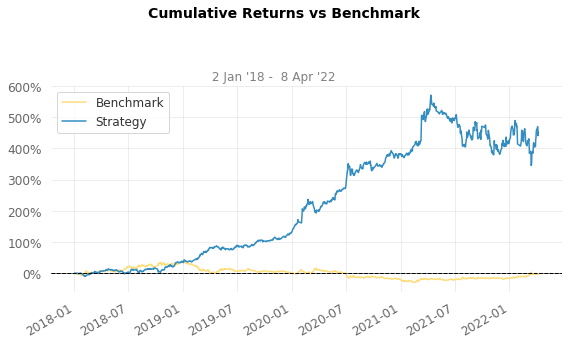

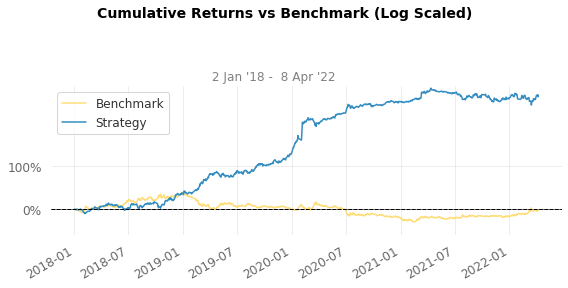

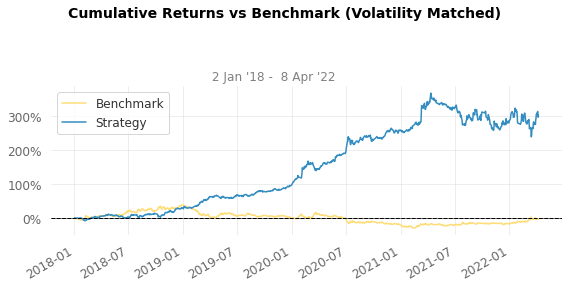

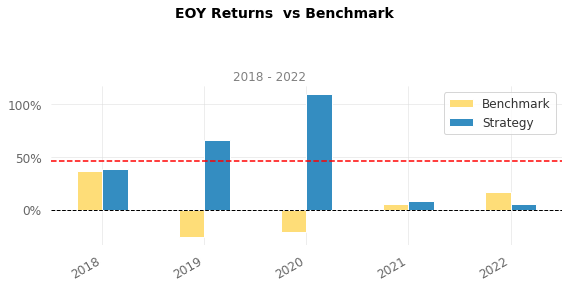

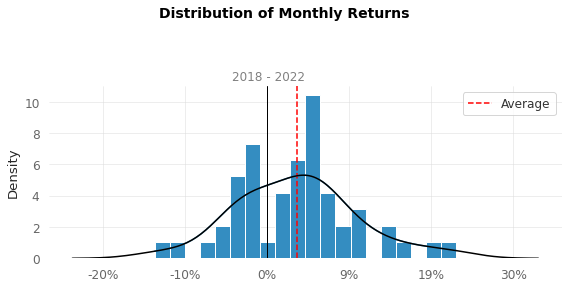

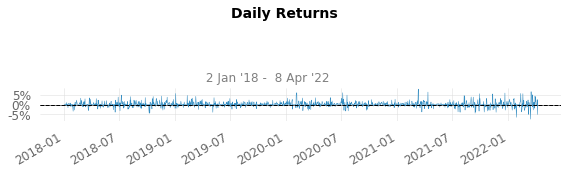

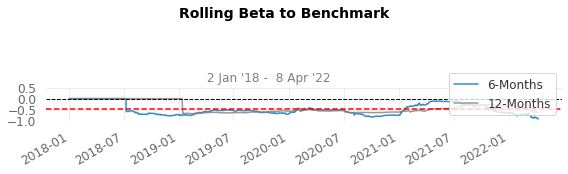

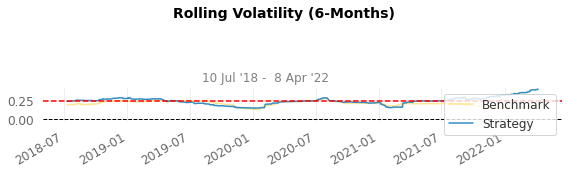

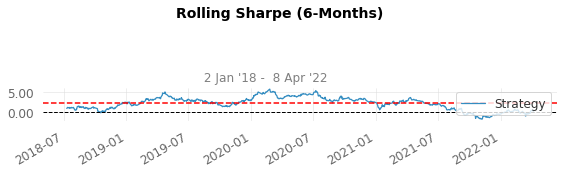

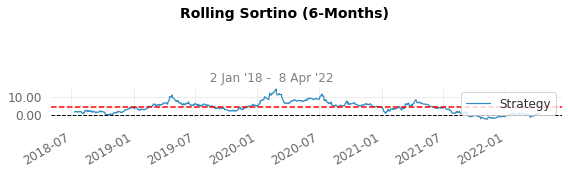

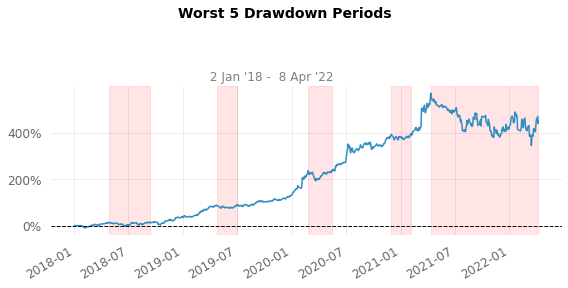

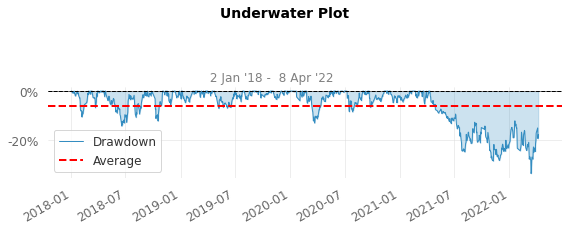

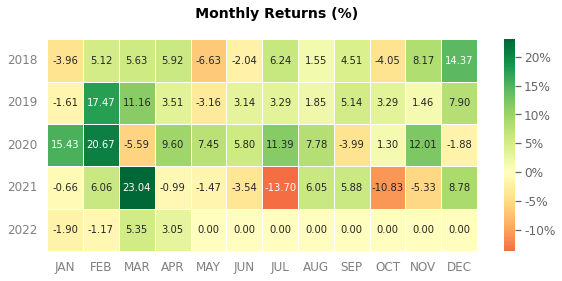

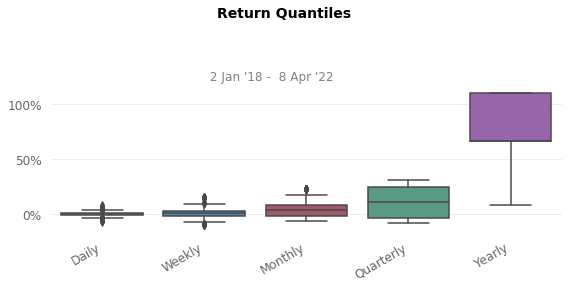

In [15]:
import pandas as pd
from xlib import data
import akshare as ak

idx_data = ak.index_zh_a_hist(symbol='000300', period="daily", start_date='20180101', end_date='20220410')    
idx_data.rename(columns={'日期':'date', '开盘':'open', '收盘':'close', 
                           '最高':'high', '最低':'low', '成交量':'volume',
                           '成交额':'amount', '振幅':'swing', '涨跌幅':'chg_pct',
                           '涨跌额':'chg_amount', '换手率':'turnover',
                          }, inplace = True)
idx_data['date'] = pd.to_datetime(idx_data['date'], format='%Y-%m-%d')
bench=idx_data.set_index('date')

df=pd.DataFrame()
df=pd.read_csv('./xlib/cache/fin.csv',index_col=0)
df=df.reset_index(drop=True)
df['label']=df['close'].shift(-30)/df['close']*10


df['industry']=pd.factorize(df["industry"])[0].astype(int)

from xlib import model
df_train,df_valid,df_pred=model.datasplit(df,train_end='2017-01-01',valid_end='2018-01-01')
model.lgbtrain(df_train,df_valid,label='label')  
preds=model.lgbpred(df_pred,label='label') 

from xlib.strategies import Top10Strategy
from xlib import backtest
preds['score']=preds.apply(lambda x: -9 if x['high']==x['low'] else x['pred'] ,axis=1)
preds['rank']=preds.groupby('date')['score'].rank(method='max',ascending=False)
preds['signal']=preds.apply(lambda x: 1 if x['rank']<=10 else 0 ,axis=1)


returns=backtest.test(preds,Top10Strategy,hold_day=30)
preds=preds[preds.signal==1]
preds.to_csv("./xlib/cache/preds30.csv")

backtest.analysis(returns,bench)

In [16]:
import pandas as pd
from sklearn import svm
from xlib import model

clf = svm.SVC(gamma='scale')
df=pd.DataFrame()
df=pd.read_csv('./xlib/cache/fin.csv',index_col=0)
df=df.reset_index(drop=True)
df['label']=df['close'].shift(-30)/df['close']

print(df.columns)

df['industry']=pd.factorize(df["industry"])[0].astype(int)


df_train,df_valid,df_pred=model.datasplit(df,train_end='2017-01-01',valid_end='2018-01-01')

if True:
    df_train=df_train.drop('date', axis=1)   
    df_train=df_train.drop('symbol', axis=1)   
    df_train= df_train.drop('open', axis=1) 
    df_train= df_train.drop('close', axis=1) 
    df_train= df_train.drop('high', axis=1) 
    df_train= df_train.drop('low', axis=1) 
    df_train= df_train.drop('volume', axis=1) 
    df_train= df_train.drop('amount', axis=1) 
    df_train= df_train.drop('adj_factor', axis=1) 
    df_train= df_train.drop('vwap', axis=1) 
    df_train= df_train.drop('prev_close', axis=1) 
    df_train= df_train.drop('returns', axis=1) 
    df_train= df_train.drop('trad_asset', axis=1) 
    df_train= df_train.drop('fa_avail_for_sale', axis=1) 
    df_train= df_train.drop('htm_invest', axis=1) 
    df_train= df_train.drop('lt_eqt_invest', axis=1) 
    df_train= df_train.drop('goodwill', axis=1) 
    df_train= df_train.drop('total_mv', axis=1)     
    y_train=df_train['label']
    x_train=df_train.drop('label', axis=1)
    y_valid=df_valid['label']
    x_valid=df_valid.drop('label', axis=1)  
    x_train=x_train.fillna(0)
    y_train=y_train.fillna(0).astype('int')
clf.fit(x_train, y_train)

Index(['date', 'symbol', 'open', 'high', 'low', 'close', 'pre_close', 'change',
       'pct_chg', 'vol', 'amount', 'adj_factor', 'vwap', 'prev_close',
       'returns', 'volume', 'trad_asset', 'fa_avail_for_sale', 'htm_invest',
       'lt_eqt_invest', 'goodwill', 'total_mv', 'industry', 'f1', 'f2', 'f3',
       'f4', 'f5', 'f12', 'f13', 'f22', 'f23', 'f32', 'f33', 'f42', 'f43',
       'f52', 'f53', 'label'],
      dtype='object')


SVC()

In [17]:
import numpy as np
print(x_train.columns)
print(x_pred.columns)

if True:
    df_pred=df_pred.drop('label', axis=1)  
    x_pred= df_pred.drop('date', axis=1)   
    x_pred = x_pred.replace([np.inf, -np.inf], np.nan) 
    x_pred= x_pred.drop('symbol', axis=1)  
    x_pred= x_pred.drop('open', axis=1) 
    x_pred= x_pred.drop('close', axis=1) 
    x_pred= x_pred.drop('high', axis=1) 
    x_pred= x_pred.drop('low', axis=1) 
    x_pred= x_pred.drop('volume', axis=1) 
    x_pred= x_pred.drop('amount', axis=1) 
    
    x_pred= x_pred.drop('adj_factor', axis=1) 
    x_pred= x_pred.drop('vwap', axis=1) 
    x_pred= x_pred.drop('prev_close', axis=1) 
    x_pred= x_pred.drop('returns', axis=1) 
    x_pred= x_pred.drop('trad_asset', axis=1) 
    x_pred= x_pred.drop('fa_avail_for_sale', axis=1) 
    x_pred= x_pred.drop('htm_invest', axis=1) 
    x_pred= x_pred.drop('lt_eqt_invest', axis=1) 
    x_pred= x_pred.drop('goodwill', axis=1) 
    x_pred= x_pred.drop('total_mv', axis=1)      
    
    x_pred=x_pred.fillna(0)
    print(x_pred)
    res = clf.predict(x_pred)

print( res )

Index(['pre_close', 'change', 'pct_chg', 'vol', 'industry', 'f1', 'f2', 'f3',
       'f4', 'f5', 'f12', 'f13', 'f22', 'f23', 'f32', 'f33', 'f42', 'f43',
       'f52', 'f53'],
      dtype='object')
Index(['pre_close', 'change', 'pct_chg', 'vol', 'industry', 'f1', 'f2', 'f3',
       'f4', 'f5', 'f12', 'f13', 'f22', 'f23', 'f32', 'f33', 'f42', 'f43',
       'f52', 'f53'],
      dtype='object')
        pre_close    change  pct_chg         vol  industry        f1  \
732      0.000000  0.000000   0.0000        0.00         0  0.000000   
733      0.000000  0.000000   0.0000        0.00         0  0.000000   
734      0.000000  0.000000   0.0000        0.00         0  0.000000   
735      0.000000  0.000000   0.0000        0.00         0  0.000000   
736      0.000000  0.000000   0.0000        0.00         0  0.000000   
...           ...       ...      ...         ...       ...       ...   
580238   3.729847  0.099996   2.6810  2671908.66        19  0.388059   
580239   3.830000  0.380000   

In [14]:
for i in range(0,100):
    print(res[i*100])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
1
1
1
1
1
0
0
0
1
1
0
1
1
0
0
0
0
0
0
1
1
1
0
1
0
0
0
1
0
0
1
1
1
1
1
1
0
0
0
0
0
1
1
1
1
1
0
0
0
0
1
1
1
0
0
0
1
0
0
0
1
0
1
